## 경사 하강법

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter

def sum_of_squares(v):
    return sum(v_i **2 for v_i in v)

def scalar_multiply(c,v):
    return [c* v_i for v_i in v]

def vector_subtract(v, w):
    return [v_i - w_i for v_i,w_i in zip(v,w)]

def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

def distance(v, w):
    return math.sqrt(squared_distance(v,w))

In [9]:
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt

%pylab inline

vector = [i for i in range(10)]
print(vector)
sum_of_squares(vector)
np.sum(np.square(vector))

Populating the interactive namespace from numpy and matplotlib
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\Public\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['setp', 'random', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


285

285

##  f가 단변수 함수인 경우

In [10]:
# x가 x+h로 변하는 동안 f(x) -> f(x+h) 변화량 기울기
def difference_quotient(f, x, h):
    return ((f(x+h) - f(x)) / h)

range(-10, 10)
[-19.999989999064383, -17.99998999985064, -15.999989999215812, -13.999989999291527, -11.999989999367243, -9.999989999798231, -7.999990000051581, -5.999990000127297, -3.999990000025377, -1.9999899999900703, 1e-05, 2.00001000001393, 4.000010000027032, 6.000009999951316, 8.00000999952033, 10.000009999444615, 12.000009999724169, 14.000009999648453, 16.00000999957274, 18.00000999878648]


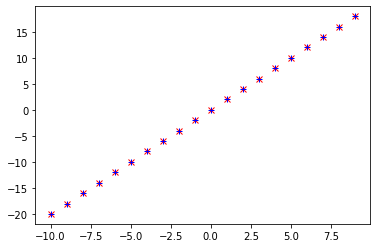

In [14]:
def plot_estimated_derivative():
    def square(x):
        return x * x
    def derivative(x):
        return 2 * x
    
    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001) #X가 0.00001증가하는 동안 y값의 변화 기울기
    
    x = range(-10, 10)
    print(x)
    print(list(map(derivative_estimate, x)))
    plt.plot(x, list(map(derivative, x)), 'rx')
    plt.plot(x, list(map(derivative_estimate, x)), 'b+')
    plt.show()
    
plot_estimated_derivative()

##  f가 다변수 함수인 경우

In [16]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w)- f(v) / h)

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotiend(f,v,i,h) for i, in enumerate(v)]

In [25]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10, 10) for i in range(3)]
tolerance = 0.000000001

while True:
    #print(v, sum_of_squares(v))
    #print(sum_of_squares_gradient(v))
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.0001)
    #print(next_v, v)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    #print(v)

print("minimum v:", v)
print("minimum value:", sum_of_squares(v))

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


minimum v: [0.0, 1.9693413698108896e-06, 4.595129862891993e-06]
minimum value: 2.499352388769042e-11


##  적절한 이동 거리 정하기

In [26]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

## 미니 배치(확률적) 경사 하강법

In [29]:
def minimize_batch(targe_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]
    
    theta = theta_0
    value = target_fn(theta)
    
    while Ture:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_size]
        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn), negate_all(target_fn), theta_0, tolerance)

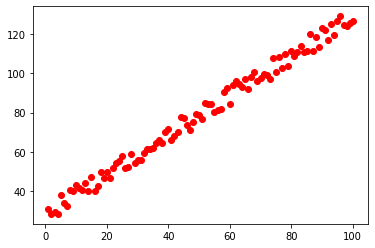

In [30]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)

plt.plot(x[:,1]+1,y,"ro")
plt.show()

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77

array([29.78019176,  0.99874586])

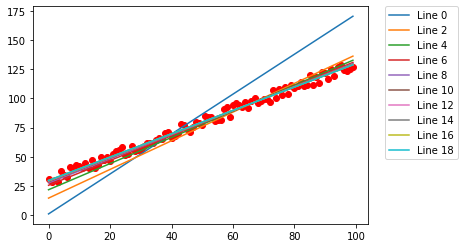

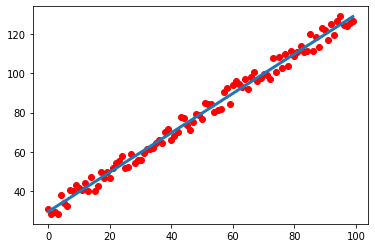

In [32]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
        if i % 2500 == 0:
            theta_list.append(theta)
    return theta,np.array(theta_list)

m, n = np.shape(x)
numIterations= 50000
alpha = 0.0005
x.transpose()
theta = np.ones(n)
theta,theta_list = gradientDescent(x, y, theta, alpha, m, numIterations)

theta

y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

y_predict= np.dot(x, theta)

plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)

# 201601769 나요한